In [2]:
# Code liberally inspired by and pulled from:
# https://www.analyticsvidhya.com/blog/2019/05/understanding-visualizing-neural-networks/

In [3]:
import numpy as np
import random
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
import os
from keras import optimizers, initializers
import tensorflow as tf
import keras
from keras.models import load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# Load Data
X_dev = np.load('X_dev_224.npy')
print(X_dev.shape)

(2426, 224, 224, 3)


In [5]:
# Load Model
model = load_model('bestVGG16.h5')
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________

In [6]:
# create a mapping of model layer name to layer details
layers_info = {}
for i in model.layers:
    layers_info[i.name] = i.get_config()

In [7]:
# create a mapping of model layer name to layer weights
layer_weights = {}
for i in model.layers:
    layer_weights[i.name] = i.get_weights()

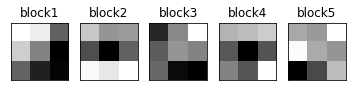

In [8]:
layers = model.layers
layer_ids = [1,4,7,11,15]
#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(5):
    ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')
    ax[i].set_title('block'+str(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [9]:
# Imports for Activation Maximization
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from keras import applications
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,6)

In [ ]:
layer_idx = utils.find_layer_idx(model,'dense_3')
#changing the activation of the layer to linear
model.layers[layer_idx].activation = activations.linear
#applying modifications to the model
model = utils.apply_modifications(model)
img3 = visualize_activation(model,layer_idx,filter_indices=8,max_iter=1000,verbose=False)

In [ ]:
plt.imshow(img3)

In [13]:
plt.imsave('activation_max/Aston_Martin_Convertible.png', img3)